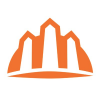
# The Quickest Introduction to Julia
#### (for Pythonistas)

Paweł Święcki

_This notebook is based on `Julia 0.6.1`._

_This notebook can be found here:_

### https://gist.github.com/pawelswiecki

## 1. What is Julia and why should I care?

Julia is:

* **Fast** (like C, C++, ...; unlike Python, Ruby, ...)

* **Easy to learn, quick to prototype with** (like Python, ...; unlike C, C++, Java, ...)

* **Free** (like basically every language; unlike Matlab, Mathematica)

It's designed to perform high performance numerical and scientific computing.

It's **fast** due to **JIT compiler** and **smart type system** that helps the compiler to optimize the code. Mind that the programmer needs to know how to use the type system to achieve high performance. Julia also has powerful **metaprogramming capabilities**. 

I won't talk about type system or metaprogramming.

What I will talk about:

* basic types

* syntax

* defining functions

* control flow

* arrays and indexing

* calling Python modules from Julia code

But first...

#### JIT compiler in action

In [2]:
function add(x, y)
    return x + y
end

add (generic function with 1 method)

In [3]:
@time add(10, 20)

  0.003841 seconds (162 allocations: 10.409 KiB)


30

In [4]:
@time add(110, 120)

  0.000002 seconds (4 allocations: 160 bytes)


230

In [5]:
@time add(30.0, 40.0)

  0.005586 seconds (157 allocations: 10.153 KiB)


70.0

In [6]:
@time add(130.0, 140.0)

  0.000003 seconds (5 allocations: 176 bytes)


270.0

## 2. Basic types

### 2.1. Numeric types

In [6]:
i = 10

10

In [7]:
typeof(i)

Int64

In [8]:
f = 10.1

10.1

In [9]:
typeof(f)

Float64

In [10]:
r = 1//2

1//2

`//`? What is `r`?

In [11]:
r + 2

5//2

In [12]:
typeof(r)

Rational{Int64}

In [13]:
println(numerator(1//2))
println(denominator(1//2))

1
2


In [14]:
1//2 / 7//8

4//7

In [15]:
(1//2 + 1//4) * 2//5

3//10

We can use rational numbers with denominator of zero (`0`).

In [16]:
1//0

1//0

In [17]:
1//0 + 10

1//0

**In Python** there is no special syntax for rational numbers:

```python
# Python code
In [1]: from fractions import Fraction

In [2]: r = Fraction(1, 2)  # or Fraction('1/2')

In [3]: r + 2
Out[3]: Fraction(5, 2)

In [4]: r.numerator, r.denominator
Out[4]: (1, 2)

In [5]: (Fraction('1/2') + Fraction('1/4')) * Fraction('2/5')
Out[5]: Fraction(3, 10)
    
In [6]: Fraction(1, 0)
ZeroDivisionError: Fraction(1, 0)
    
In [7]: # ¯\_(ツ)_/¯
```

### 2.2. Strings and Chars

In [18]:
# We use double quote `"` for Strings.
s = "Hello there!"

"Hello there!"

In [19]:
typeof(s)

String

In [20]:
# We use single quote `'` for Chars.
c = 'q'

'q': ASCII/Unicode U+0071 (category Ll: Letter, lowercase)

In [21]:
typeof(c)

Char

Indexing strings returns chars.

In [22]:
s[4]

'l': ASCII/Unicode U+006c (category Ll: Letter, lowercase)

In [23]:
typeof(s[1])

Char

So in Julia a single element of a String is a Char.

Unlike **in Python**, where it's another string:

```python
# Python code:
In [1]: s = "Hello there!"

In [2]: s[0]
Out[2]: 'H'

In [3]: s[0][0]
Out[3]: 'H'

In [4]: s[0][0][0]
Out[4]: 'H'
    
In [5]: s[0][0][0][0]
Out[5]: 'H'
```

## 3. Syntax

### 3.1. Indexing

Julia uses **1-based indexing**.

This is one of the biggest syntactic differences between Julia and Python (or, as a matter of fact, between Julia and most of the modern programming languages).

Matlab, Mathematica, Fortran use 1-based indexing as well.

In [24]:
s2 = "ABCDEFG"

"ABCDEFG"

In [25]:
s2[0]

LoadError: [91mBoundsError: attempt to access "ABCDEFG"
  at index [0][39m

In [26]:
s2[1]

'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)

#### Accessing the last element

In [27]:
s2[end]

'G': ASCII/Unicode U+0047 (category Lu: Letter, uppercase)

In [28]:
s2[end-1]

'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)

#### Slicing

In [29]:
s2[1:3]

"ABC"

In [30]:
s2[2:end-1]

"BCDEF"

Slicing with _step_ using `start:step:stop` syntax.

In [31]:
s2[1:2:end]

"ACEG"

### 3.2. Functions

#### 3.2.1. Defining functions

_Standard notation_

In [32]:
function add1(x, y)
    return x + y
end

add1 (generic function with 1 method)

In [33]:
add1(1, 2)

3

Unlike in Python: 
* `return` keyword is optional, value of the last expression gets returned. We can use `return` to return immediately;

* indentation is optional (`end` keyword defines end of blocks).

So this is equivalent: `function add1(x, y) x + y end`

_Math-like notation_

In [34]:
add2(x, y) = x + y

add2 (generic function with 1 method)

In [35]:
add2(10, 20)

30

Just like in Python, functions are first-class objects in Julia.

We also can use **anonymous functions**.

In [36]:
((x, y) -> x + y)

(::#1) (generic function with 1 method)

In [37]:
((x, y) -> x + y)(100, 200)

300

We can assign an anonymous function to a name.

In [38]:
add3 = (x, y) -> x + y

(::#5) (generic function with 1 method)

In [39]:
add3(100, 200)

300

#### 3.2.2. Operators are functions

In [40]:
# this is a syntactic sugar
1 + 2

# for this
+(1, 2)

3

Also, we can pass operators around, just like any other functions.

In [41]:
silly_apply(fn, arg1, arg2) = fn(arg1, arg2)

silly_apply(+, 1, 2)

3

#### 3.2.3. Function naming convention

Julia has a pretty smart naming convention: if a function's name ends with a bang (`!`) we know it may mutate its argument(s).

In [42]:
my_array = [1, 2, 3, 4, 5, 6, 7]

7-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7

In [43]:
reverse(my_array)

7-element Array{Int64,1}:
 7
 6
 5
 4
 3
 2
 1

In [44]:
my_array

7-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7

In [45]:
reverse!(my_array)

7-element Array{Int64,1}:
 7
 6
 5
 4
 3
 2
 1

In [46]:
my_array

7-element Array{Int64,1}:
 7
 6
 5
 4
 3
 2
 1

### 3.3. Control flow

#### 3.3.1. Conditional syntax

In [47]:
function how_big_it_is(x)
    if x < 2
        println("$x is little")
    elseif x < 7
        println("$x is pretty small.")
    elseif x < 20
        println("$x is medium.")
    elseif x < 100
        println("$x is big.")
    else
        println("$x is huge!")
    end
end

how_big_it_is (generic function with 1 method)

In [48]:
how_big_it_is(1)

1 is little


In [49]:
how_big_it_is(99)

99 is big.


**`if-elseif-else-end` blocks are expressions** — they return a value. "This value is simply the return value of the last executed statement in the branch that was chosen" [[docs](https://docs.julialang.org/en/release-0.6/manual/control-flow/#man-conditional-evaluation-1)].

In [50]:
function is_it_one(x)
    answer =
        if x == 1
            println("It equals one! 🎉")
            true
        else
            println("$x doesn't equal one... 😟")
            false
        end
    return answer
end

is_it_one (generic function with 1 method)

In [51]:
is_it_one(25)

25 doesn't equal one... 😟


false

In [52]:
is_it_one(1)

It equals one! 🎉


true

#### 3.3.2. For loops

In [53]:
for n = [1, 2, 3]
    println(n)
end

1
2
3


In [54]:
# `=` can be replaced with `in`
for c in ['a', 'b', 'c']
    println(c)
end

a
b
c


In [55]:
for i in 1:6
    println(i)
end
# what is this `1:6`?

1
2
3
4
5
6


_Range objects_

In [56]:
# a range object
range1 = 1:15

1:15

In [57]:
typeof(range1)

UnitRange{Int64}

In [58]:
10 in range1

true

In [59]:
# accessing range elements by index
range1[10]

10

In [60]:
# range with step: `start:step:stop`
for i in -10:3:11
    println(i)
end

-10
-7
-4
-1
2
5
8
11


## 4. Arrays

### 4.1. Basics

Array is the basic and very powerful Julia's collection type.

Julia's Array syntax is inspired by Matlab.

In [61]:
array1 = [1, 2, 3, 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [62]:
typeof(array1)

Array{Int64,1}

That means `array1` is a 1-dimentional array made of `Int64` elements.

**`size`** function returns a Tuple of array's dimensions: 

In [63]:
size(array1)

(4,)

In [64]:
array2 = [1 2 3]

1×3 Array{Int64,2}:
 1  2  3

`array2` is a 2-dimensional Array...

In [65]:
size(array2)

(1, 3)

... of the size 1x3, which means it has 1 row and 3 columns.

Let's create a 3x4 **2D Array**.

In [66]:
array3 = [
    1  2  3  4;
    5  6  7  8;
    9 10 11 12;
]

3×4 Array{Int64,2}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

In [67]:
size(array3)

(3, 4)

Mind that Julia's 2D Array is **not** an "array of arrays" (which is, by the way, also possible to create in Julia but it's, most of the times, is not what we want). Number of dimensions is a parameter of every particular Array's type.

Let's create a **3D Array**!

In [68]:
array4 = zeros(3, 3, 3)

3×3×3 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 3] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

(**`zeros(s)`** function creates an Array filled with zeroes, in the shape of `s`)

So `array4` is a 3D Array, 3x3x3, filled with zeroes.

4D Array?

In [69]:
array5 = ones(2, 2, 2, 2)

2×2×2×2 Array{Float64,4}:
[:, :, 1, 1] =
 1.0  1.0
 1.0  1.0

[:, :, 2, 1] =
 1.0  1.0
 1.0  1.0

[:, :, 1, 2] =
 1.0  1.0
 1.0  1.0

[:, :, 2, 2] =
 1.0  1.0
 1.0  1.0

(**`ones(s)`** function creates an Array filled with ones, in the shape of `s`)

### 4.2. Linear indexing of Arrays and iterating over them

We can index Arrays linearly:

In [70]:
array3

3×4 Array{Int64,2}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

In [71]:
array3[1]

1

In [72]:
array3[2]

5

In [73]:
array3[3]

9

In [74]:
array3[end]

12

In consequence, when we iterate over a 2D (or more-D) Array we just get its elements one at a time — no need to create nested loops (remember: 2D Array is not "array of arrays"!).

In [75]:
for element in array3
    println(element)
end

1
5
9
2
6
10
3
7
11
4
8
12


### 4.3. Cartesian indexing 

But we can also use Cartesian indexing, which is indexing with Cartesian coordinates.

This way we can access an element in a specific row and column with `[row, column]` syntax for a 2D Array, or more generally `[axis-1, axis-2, ..., axis-n]` for an n-dimensional Array. 

In [76]:
array3

3×4 Array{Int64,2}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

In [77]:
array3[1, 2]

2

To get the whole dimension of the Array use `:`.

In [78]:
array3[1, :]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [79]:
array3[:, 2]

3-element Array{Int64,1}:
  2
  6
 10

In [80]:
array6 = reshape(collect(1:27), 3, 3, 3)

3×3×3 Array{Int64,3}:
[:, :, 1] =
 1  4  7
 2  5  8
 3  6  9

[:, :, 2] =
 10  13  16
 11  14  17
 12  15  18

[:, :, 3] =
 19  22  25
 20  23  26
 21  24  27

**`reshape(A, dims...)`** returns an Array containing the same data as A, but with different dimensions.

**`collect(collection)`** returns an Array of all items in a collection or iterator.

In [81]:
array6[1, 3, 2]

16

In [82]:
array6[:, 1, 2]

3-element Array{Int64,1}:
 10
 11
 12

In [83]:
array6[:, :, 2]

3×3 Array{Int64,2}:
 10  13  16
 11  14  17
 12  15  18

In [84]:
array6[1, :, :]

3×3 Array{Int64,2}:
 1  10  19
 4  13  22
 7  16  25

In [85]:
array6[1, :, 2]

3-element Array{Int64,1}:
 10
 13
 16

### 4.4. Slicing Arrays

We can also select parts of Arrays using _range_.

In [86]:
array7 = reshape(collect(1:16), 4, 4)

4×4 Array{Int64,2}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

In [87]:
array7[1:2, 1:2]

2×2 Array{Int64,2}:
 1  5
 2  6

In [88]:
array7[2:3, 1:3]

2×3 Array{Int64,2}:
 2  6  10
 3  7  11

### 4.5. Mutating Arrays

##### Using linear indexing

In [89]:
array6

3×3×3 Array{Int64,3}:
[:, :, 1] =
 1  4  7
 2  5  8
 3  6  9

[:, :, 2] =
 10  13  16
 11  14  17
 12  15  18

[:, :, 3] =
 19  22  25
 20  23  26
 21  24  27

In [90]:
array6[4] = 9999

9999

In [91]:
array6

3×3×3 Array{Int64,3}:
[:, :, 1] =
 1  9999  7
 2     5  8
 3     6  9

[:, :, 2] =
 10  13  16
 11  14  17
 12  15  18

[:, :, 3] =
 19  22  25
 20  23  26
 21  24  27

##### Using Cartesian indexing

_Single elements_

In [92]:
array6

3×3×3 Array{Int64,3}:
[:, :, 1] =
 1  9999  7
 2     5  8
 3     6  9

[:, :, 2] =
 10  13  16
 11  14  17
 12  15  18

[:, :, 3] =
 19  22  25
 20  23  26
 21  24  27

In [93]:
array6[1,2,3] = 1111111

1111111

In [94]:
array6

3×3×3 Array{Int64,3}:
[:, :, 1] =
 1  9999  7
 2     5  8
 3     6  9

[:, :, 2] =
 10  13  16
 11  14  17
 12  15  18

[:, :, 3] =
 19  1111111  25
 20       23  26
 21       24  27

_Using slicing_

In [95]:
array7[1:2, 1:2] = [99 98; 97 96]

2×2 Array{Int64,2}:
 99  98
 97  96

In [96]:
array7

4×4 Array{Int64,2}:
 99  98   9  13
 97  96  10  14
  3   7  11  15
  4   8  12  16

### 4.6. Array Comprehensions

In [97]:
[n for n in 1:5]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [98]:
[x+y for x in 1:5, y in 1:3]

5×3 Array{Int64,2}:
 2  3  4
 3  4  5
 4  5  6
 5  6  7
 6  7  8

In [99]:
[(x,y,z)
    for x = "🔴🔵⚪",
        y = "🙈🙊🙉",
        z = "🙂😬😡😂😶"]

3×3×5 Array{Tuple{Char,Char,Char},3}:
[:, :, 1] =
 ('🔴', '🙈', '🙂')  ('🔴', '🙊', '🙂')  ('🔴', '🙉', '🙂')
 ('🔵', '🙈', '🙂')  ('🔵', '🙊', '🙂')  ('🔵', '🙉', '🙂')
 ('⚪', '🙈', '🙂')  ('⚪', '🙊', '🙂')  ('⚪', '🙉', '🙂')

[:, :, 2] =
 ('🔴', '🙈', '😬')  ('🔴', '🙊', '😬')  ('🔴', '🙉', '😬')
 ('🔵', '🙈', '😬')  ('🔵', '🙊', '😬')  ('🔵', '🙉', '😬')
 ('⚪', '🙈', '😬')  ('⚪', '🙊', '😬')  ('⚪', '🙉', '😬')

[:, :, 3] =
 ('🔴', '🙈', '😡')  ('🔴', '🙊', '😡')  ('🔴', '🙉', '😡')
 ('🔵', '🙈', '😡')  ('🔵', '🙊', '😡')  ('🔵', '🙉', '😡')
 ('⚪', '🙈', '😡')  ('⚪', '🙊', '😡')  ('⚪', '🙉', '😡')

[:, :, 4] =
 ('🔴', '🙈', '😂')  ('🔴', '🙊', '😂')  ('🔴', '🙉', '😂')
 ('🔵', '🙈', '😂')  ('🔵', '🙊', '😂')  ('🔵', '🙉', '😂')
 ('⚪', '🙈', '😂')  ('⚪', '🙊', '😂')  ('⚪', '🙉', '😂')

[:, :, 5] =
 ('🔴', '🙈', '😶')  ('🔴', '🙊', '😶')  ('🔴', '🙉', '😶')
 ('🔵', '🙈', '😶')  ('🔵', '🙊', '😶')  ('🔵', '🙉', '😶')
 ('⚪', '🙈', '😶')  ('⚪', '🙊', '😶')  ('⚪', '🙉', '😶')

## 5. Calling Python code

Suppose we want to use Python's *requests* library in Julia. 

In Python using the library would look like this:

```python
# Python code
In [1]: import requests

In [2]: response = requests.get("http://httpbin.org/get")

In [3]: response.status_code
Out[3]: 200

In [4]: response.headers
Out[4]: {'Connection': 'keep-alive', 'Server': 'meinheld/0.6.1', 'Date': 'Sat, 18 Nov 2017 19:51:47 GMT', 'Content-Type': 'application/json', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'X-Powered-By': 'Flask', 'X-Processed-Time': '0.000778198242188', 'Content-Length': '265', 'Via': '1.1 vegur'}
```

In Julia we can use **PyCall library**!

In [100]:
# Pkg.add("PyCall")
using PyCall
@pyimport requests  # given we have requests installed! 

In [101]:
response = requests.get("http://httpbin.org/get")

PyObject <Response [200]>

In [102]:
response.status_code

LoadError: [91mtype PyObject has no field status_code[39m

But...

In [103]:
response[:status_code]

200

In [104]:
response[:headers]

PyObject {'Content-Length': '265', 'X-Processed-Time': '0.00068187713623', 'X-Powered-By': 'Flask', 'Server': 'meinheld/0.6.1', 'Connection': 'keep-alive', 'Via': '1.1 vegur', 'Access-Control-Allow-Credentials': 'true', 'Date': 'Thu, 23 Nov 2017 15:25:50 GMT', 'Access-Control-Allow-Origin': '*', 'Content-Type': 'application/json'}

We can even...

In [105]:
response[:__dict__]

Dict{Any,Any} with 14 entries:
  "elapsed"           => 337 milliseconds
  "request"           => PyObject <PreparedRequest [GET]>
  "_content"          => "{\n  \"args\": {}, \n  \"headers\": {\n    \"Accept\"…
  "status_code"       => 200
  "cookies"           => PyObject <RequestsCookieJar[]>
  "history"           => Any[]
  "encoding"          => nothing
  "reason"            => "OK"
  "_next"             => nothing
  "raw"               => PyObject <urllib3.response.HTTPResponse object at 0x12…
  "url"               => "http://httpbin.org/get"
  "_content_consumed" => true
  "headers"           => PyObject {'Content-Length': '265', 'X-Processed-Time':…
  "connection"        => PyObject <requests.adapters.HTTPAdapter object at 0x12…

## BONUS: Special characters in code
We can easily use LaTeX syntax to get special symbols, like:

`\phi` - ϕ

`\Sigma` - Σ

`\Delta` - Δ

`\pi` - π

`\equiv` - ≡

Just type `\name` and press `Tab`.

We can use these symbols as names:

In [106]:
Σ = 1 + 2 + 3 + 4;
Δ = 100 - 101;

In [107]:
Σ

10

In [108]:
Δ

-1

#### Stay tuned for a talk(s) about Julia's type system and multiple dispatch!